# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [1]:
import numpy as np
np.set_printoptions(legacy='1.25')
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['target_names'], iris['target'])

['setosa' 'versicolor' 'virginica'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Make a pair plot of the iris features colored by their true classification.

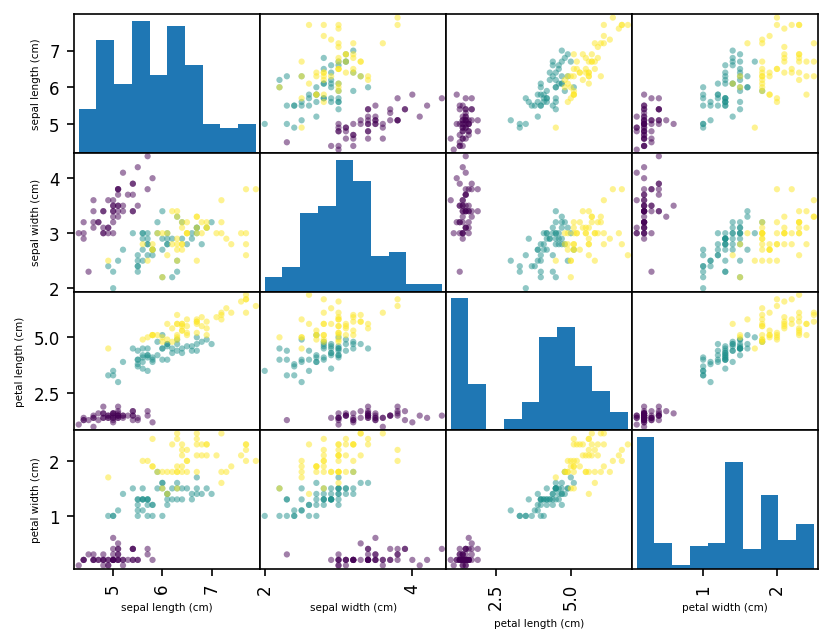

In [3]:
# import
import pandas as pd

iris_frame = pd.DataFrame(iris['data'], columns=iris.feature_names)
matrix = pd.plotting.scatter_matrix(iris_frame, c=iris['target'])
for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=5)
    ax.set_ylabel(ax.get_ylabel(), fontsize=5)
plt.show()

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

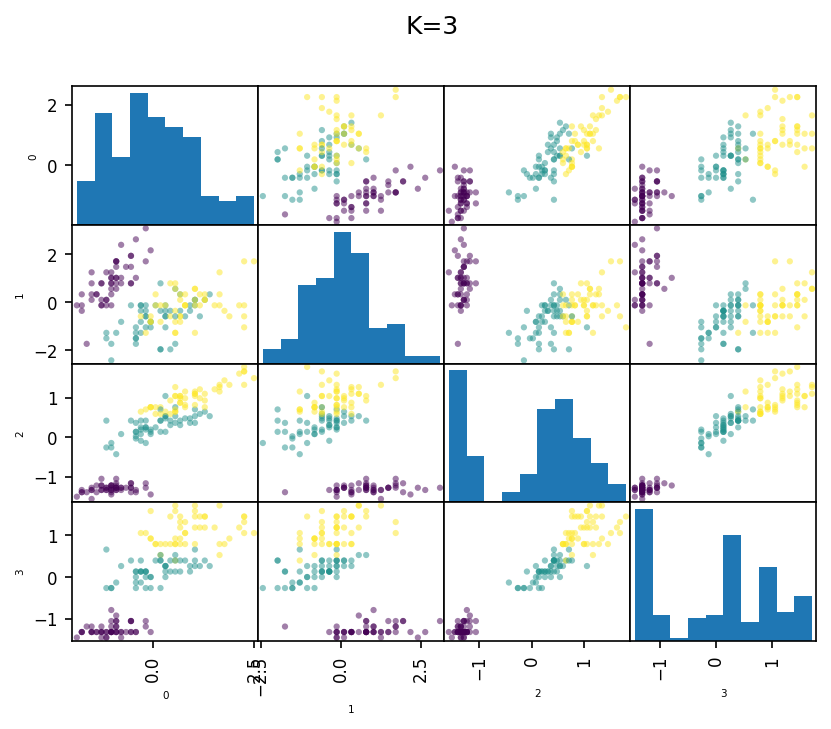

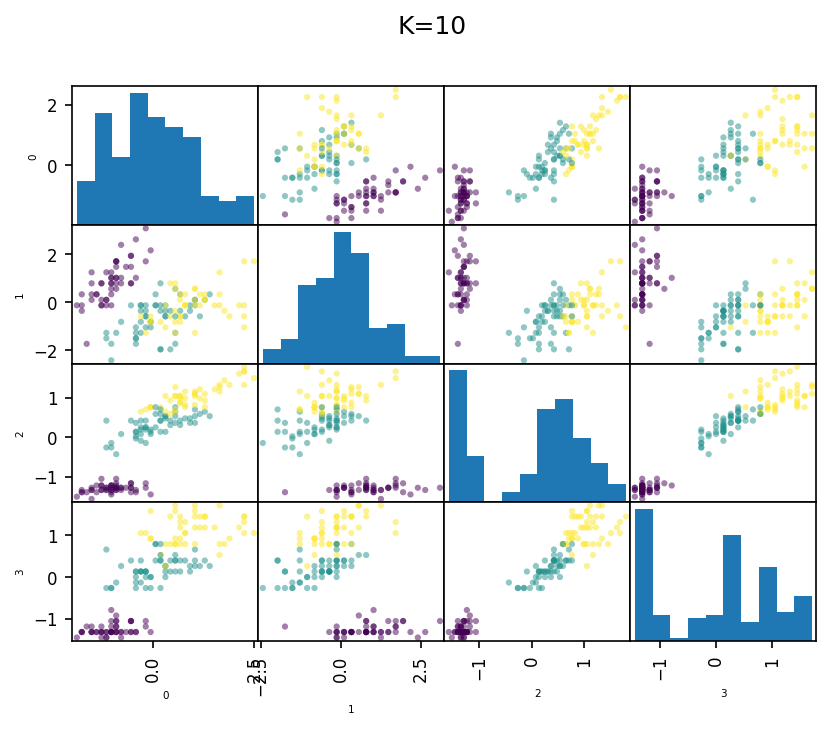

K=3:
	accuracy	= 0.9533333333333334
	completeness	= {'setosa': 1.0, 'versicolor': 0.94, 'virginica': 0.92}
	purity		= {'setosa': 1.0, 'versicolor': 0.9215686274509803, 'virginica': 0.9387755102040817}
K=10:
	accuracy	= 0.96
	completeness	= {'setosa': 1.0, 'versicolor': 0.98, 'virginica': 0.9}
	purity		= {'setosa': 1.0, 'versicolor': 0.9074074074074074, 'virginica': 0.9782608695652174}


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(iris_frame.values)
iris_scaled = pd.DataFrame(scaler.transform(iris_frame.values))

kn3 = KNeighborsClassifier(n_neighbors=3)
kn3.fit(iris_scaled, iris['target'])
cluster3 = kn3.predict(iris_scaled)
scatter3 = pd.plotting.scatter_matrix(iris_scaled, c=cluster3)
plt.suptitle('K=3')

kn10 = KNeighborsClassifier(n_neighbors=10)
kn10.fit(iris_scaled, iris['target'])
cluster10 = kn10.predict(iris_scaled)
scatter10 = pd.plotting.scatter_matrix(iris_scaled, c=cluster10)
plt.suptitle('K=10')

for scatter_plot in [scatter3, scatter10]:
    for ax in scatter_plot.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=5)
        ax.set_ylabel(ax.get_ylabel(), fontsize=5)
plt.show()


def accuracy(predicted: list, real: list):
    return np.sum(predicted == real) / len(real)

def completeness(predicted: list, real: list, classes):
    completeness_values = dict()
    for i, class_name in enumerate(classes):
        completeness_values[class_name] = np.bitwise_and(predicted == real,  predicted == i).sum() / (real == i).sum()
    return completeness_values

def purity(predicted: list, real: list, classes):
    predicted_values = dict()
    for i, class_name in enumerate(classes):
        predicted_values[class_name] = np.bitwise_and(predicted == real,  predicted == i).sum() / (predicted == i).sum()
    return predicted_values

def print_acp(title: str, predicted: list, real: list, classes):
    a = accuracy(predicted, real)
    c = completeness(predicted, real, classes)
    p = purity(predicted, real, classes)
    print(f'{title}:\n\taccuracy\t= {a}\n\tcompleteness\t= {c}\n\tpurity\t\t= {p}')

print_acp("K=3", cluster3, iris['target'], iris['target_names'])
print_acp("K=10", cluster10, iris['target'], iris['target_names'])

*The results are quite accurate. This makes sense, because I am comparing a model to its own data. This could destroy the accuracy of the model against other data, though, because it could introduce overfitting.*

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

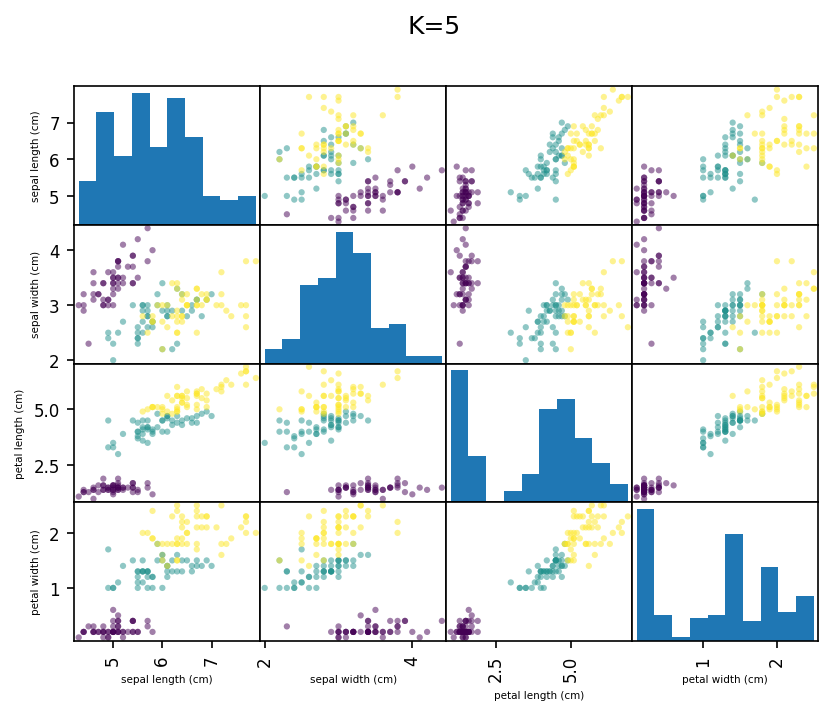

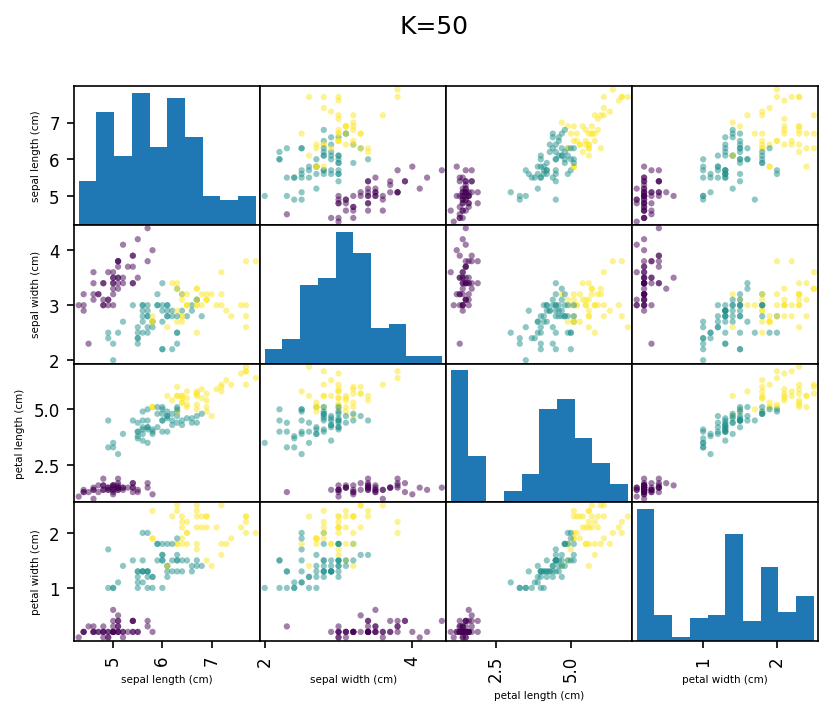

K=5:
	accuracy	= 0.9733333333333334
	completeness	= {'setosa': 1.0, 'versicolor': 0.94, 'virginica': 0.98}
	purity		= {'setosa': 1.0, 'versicolor': 0.9791666666666666, 'virginica': 0.9423076923076923}
K=50:
	accuracy	= 0.9133333333333333
	completeness	= {'setosa': 1.0, 'versicolor': 0.94, 'virginica': 0.8}
	purity		= {'setosa': 1.0, 'versicolor': 0.8245614035087719, 'virginica': 0.9302325581395349}


In [5]:
from sklearn.model_selection import cross_val_predict

kn5 = KNeighborsClassifier(n_neighbors=5)
cluster5 = cross_val_predict(kn5,iris_frame, iris['target'])
scatter5 = pd.plotting.scatter_matrix(iris_frame, c=cluster5)
plt.suptitle("K=5")

kn50 = KNeighborsClassifier(n_neighbors=50)
cluster50 = cross_val_predict(kn50,iris_frame, iris['target'])
scatter50 = pd.plotting.scatter_matrix(iris_frame, c=cluster50)
plt.suptitle("K=50")

for scatter_plot in [scatter5, scatter50]:
    for ax in scatter_plot.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=5)
        ax.set_ylabel(ax.get_ylabel(), fontsize=5)
plt.show()

print_acp("K=5", cluster5, iris['target'], iris['target_names'])
print_acp("K=50", cluster50, iris['target'], iris['target_names'])

*The accuracy, completeness, and purity are all better with $K=5$ than $K=50$.*

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [6]:
#calculated above

*I think that the inaccuracy, incompleteness, and contamination make sense because a higher k-value will introduce elements from more classes into the calculation for each data point*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

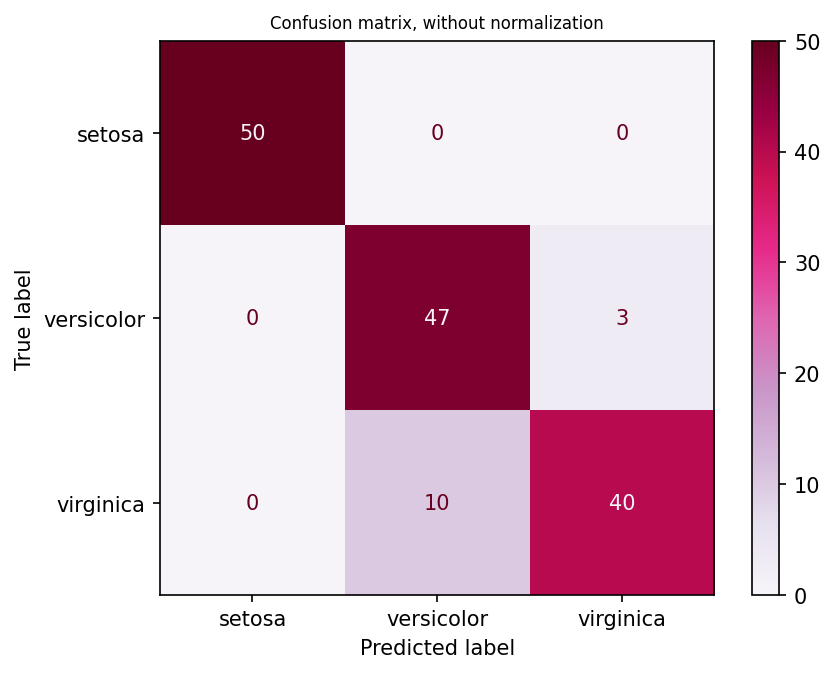

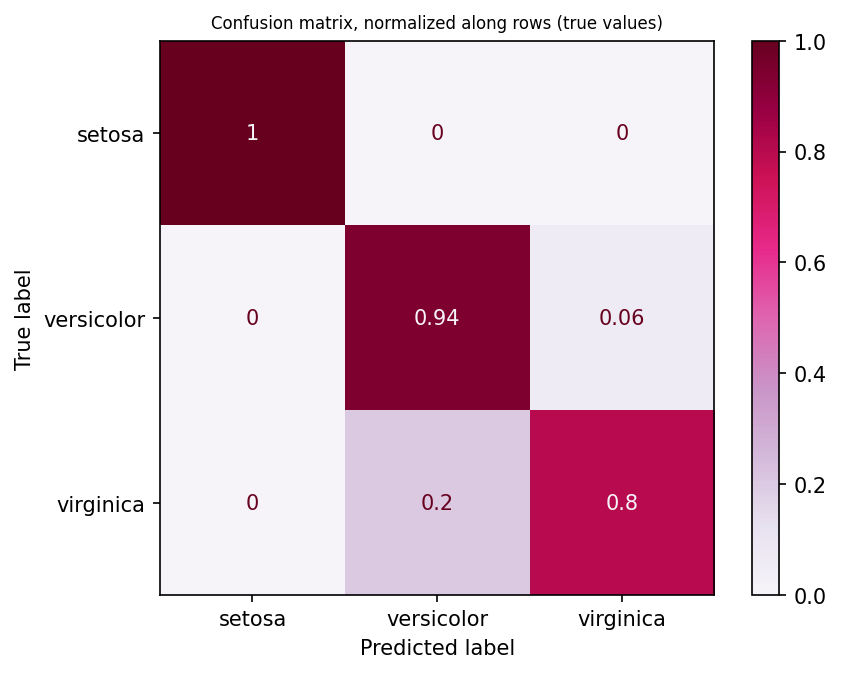

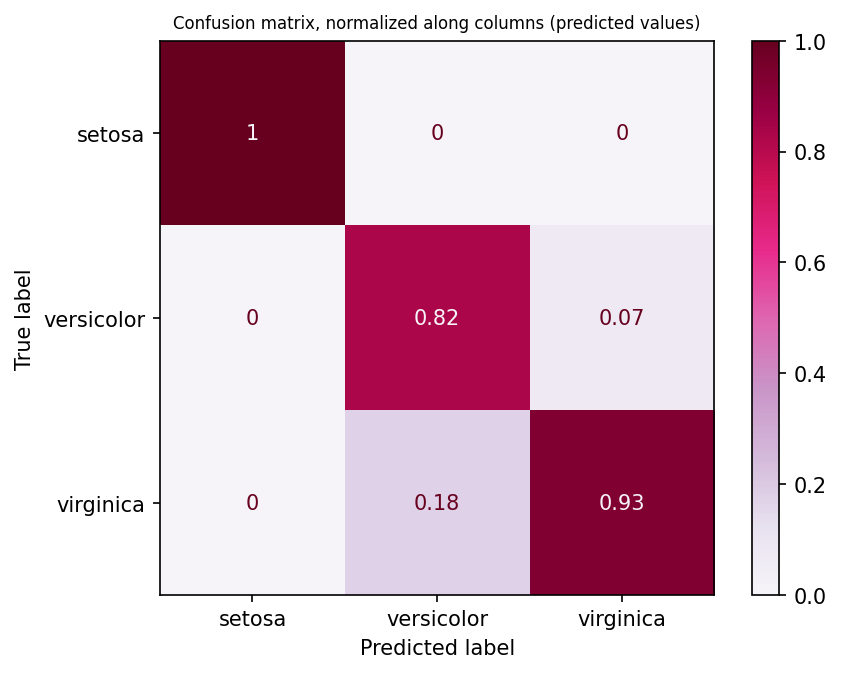

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Confusion matrix, normalized along rows (true values)", "true"),
    ("Confusion matrix, normalized along columns (predicted values)", "pred"),
]

for title, normalize in title_options:
    confusion_matrix = ConfusionMatrixDisplay.from_predictions(
        iris['target'],
        cluster50,
        display_labels=iris['target_names'],
        cmap=plt.cm.PuRd,
        normalize = normalize
    )
    confusion_matrix.ax_.set_title(title, fontsize=8)


*I think that the normalized ones are more useful than the non-normalized one, and that the one normalized along the predicted values is easier to understand than the one normalized along true values, so I would say that (along columns) is best.*